# Lab 3: Minimizing Cost

Author: Seungjae Lee (이승재)

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Theoretical Overview

$$ H(x) = Wx $$

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

 - $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
 - $cost(W)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

Note that it is simplified, without the bias $b$ added to $H(x)$.

## Imports

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# For reproducibility
torch.manual_seed(1)

## Data

We will use fake data for this example.

기본적으로 PyTorch는 NCHW 형태이다.

In [39]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

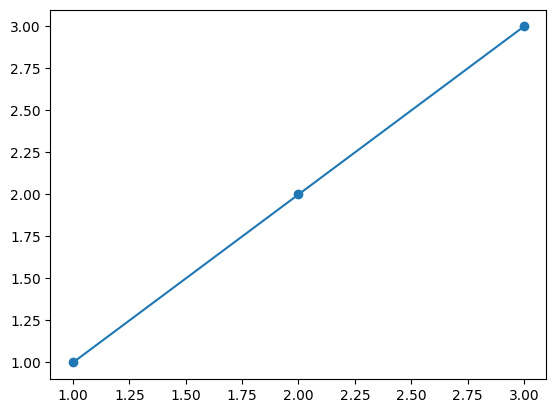

In [6]:
# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000)
plt.plot(xs, xs)

## Cost by W

$$ H(x) = Wx $$

In [31]:
W_l = np.linspace(-5, 5, 1000)
cost_l = []
cost_l1 = []
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)
    cost_hand = torch.sum((hypothesis - y_train) ** 2) / 3 # sum只是将所有的tensor项给累加 mean多了一步就是除上number
    cost_l.append(cost.item())
    cost_l1.append(cost_hand)

print(cost_l)
print(cost_l1)




[228.6666717529297, 228.01312255859375, 227.3605499267578, 226.70887756347656, 226.0581817626953, 225.4084014892578, 224.75958251953125, 224.1116485595703, 223.4646759033203, 222.8186492919922, 222.1735382080078, 221.5293731689453, 220.88616943359375, 220.2438507080078, 219.6024932861328, 218.96205139160156, 218.3225860595703, 217.6840057373047, 217.04640197753906, 216.40968322753906, 215.77394104003906, 215.13914489746094, 214.5052947998047, 213.872314453125, 213.2403106689453, 212.6092071533203, 211.97911071777344, 211.3498992919922, 210.7216339111328, 210.0942840576172, 209.4678955078125, 208.84242248535156, 208.2178955078125, 207.59429931640625, 206.97166442871094, 206.3498992919922, 205.7291259765625, 205.1092987060547, 204.4904022216797, 203.8723907470703, 203.2553253173828, 202.63922119140625, 202.0240478515625, 201.40980529785156, 200.7965087890625, 200.18414306640625, 199.5726776123047, 198.9622039794922, 198.3526153564453, 197.74400329589844, 197.1362762451172, 196.5295410156

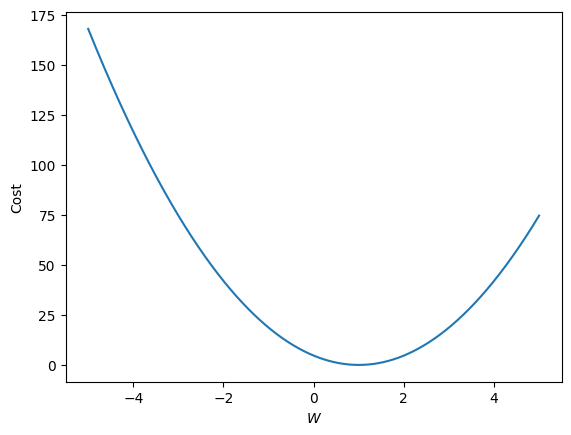

In [13]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

## Gradient Descent by Hand

In [41]:
W = 0

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)}$$ 
$$ \nabla W就是cost(W)函数某点的斜率,也就是说当斜率逼近0的时候，loss就越小 $$ 

In [43]:
print("x_train","y_train",x_train,y_train)
print((2 / len(x_train) ))
gradient = torch.sum((W * x_train - y_train) * x_train) * (2 / len(x_train) )
print(gradient)

x_train y_train tensor([[1.],
        [2.],
        [3.]]) tensor([[1.],
        [2.],
        [3.]])
0.6666666666666666
tensor(-9.3333)


$$ W := W - \alpha \nabla W $$

In [ ]:
lr = 0.1
W -= lr * gradient
print(W,4444)

tensor(0.9333)


## Training

In [48]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.FloatTensor([0.])
# learning rate 설정
lr = 0.1 

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2) # cost函数随着W的变化而变化
    cost_by_hand = torch.sum((hypothesis - y_train) ** 2) / len(x_train) # 与上述变量cost一样，只是表达式不一样，是一个开口向上的二次曲线，因为 ax^2 + bx + c 中 a一直为正数 ， 此时的二次曲线，横坐标为W，纵坐标为Cost（损失）
    
    # 所以，欲找到最小的Cost（损失），那么就要找到gradient（斜率）为0时，W对应的值
    gradient = torch.sum((W * x_train - y_train) * x_train) * (2/len(x_train))# cost函数对W进行求导得到导函数，gradient为此时W点对应的斜率

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f} , gradient:{:.6f}'.format(epoch, nb_epochs, W.item(), cost.item(),gradient))

    # 这里的精髓在于该 W -= lr * gradient 想象在二维曲线中, 
    # 若W（横坐标为W，纵坐标为Cost）在极小值的左边，那么gradient的值一直为负数（斜率导致），那么根据【W -= lr * gradient】W的值就会一直增加，直到gradient的值为0的时候，W就恒等于W不会发生变化了
    # 若W在极小值的右边，那么gradient的值就一直为正数（斜率导致），那么根据【W -= lr * gradient】W的值就会一直减少，也是直到gradient的值为0的时候，W就恒等于W不会再发生增加和减少的情况，这下W就已经收敛了
    W -= lr * gradient

print("W",W)

Epoch    0/10 W: 0.000, Cost: 4.666667 , gradient:-9.333334
Epoch    1/10 W: 0.933, Cost: 0.020741 , gradient:-0.622222
Epoch    2/10 W: 0.996, Cost: 0.000092 , gradient:-0.041481
Epoch    3/10 W: 1.000, Cost: 0.000000 , gradient:-0.002765
Epoch    4/10 W: 1.000, Cost: 0.000000 , gradient:-0.000185
Epoch    5/10 W: 1.000, Cost: 0.000000 , gradient:-0.000012
Epoch    6/10 W: 1.000, Cost: 0.000000 , gradient:-0.000001
Epoch    7/10 W: 1.000, Cost: 0.000000 , gradient:0.000000
Epoch    8/10 W: 1.000, Cost: 0.000000 , gradient:0.000000
Epoch    9/10 W: 1.000, Cost: 0.000000 , gradient:0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000 , gradient:0.000000
W tensor([1.])


## Training with `optim`

In [53]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    print('Epoch{:4d}/{} W: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch   0/10 W: 0.000 Cost: 4.666667
Epoch   1/10 W: 1.400 Cost: 0.746667
Epoch   2/10 W: 0.840 Cost: 0.119467
Epoch   3/10 W: 1.064 Cost: 0.019115
Epoch   4/10 W: 0.974 Cost: 0.003058
Epoch   5/10 W: 1.010 Cost: 0.000489
Epoch   6/10 W: 0.996 Cost: 0.000078
Epoch   7/10 W: 1.002 Cost: 0.000013
Epoch   8/10 W: 0.999 Cost: 0.000002
Epoch   9/10 W: 1.000 Cost: 0.000000
Epoch  10/10 W: 1.000 Cost: 0.000000
